In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Compute the correlation matrix
corr_matrix = X.corr()

# Compute the correlation between features and the target variable
feature_target_corr = X.apply(lambda x: np.abs(x.corr(y)))

# Compute the average correlation between features
feature_avg_corr = X.apply(lambda x: np.abs(corr_matrix[x.name]).mean())

# Compute the merit of each feature
feature_merit = feature_target_corr / feature_avg_corr

# Select features with high merit
selected_features = feature_merit.nlargest(5).index

print("Selected Features after CFS:")
print(selected_features)


Selected Features after CFS:
Index(['Year', 'AverageTemperatureUncertainty', 'Country',
       'AverageTemperature'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

def fcbf(X, y, threshold):
    # Compute the correlation between features and the target variable
    feature_target_corr = X.apply(lambda x: np.abs(x.corr(y)))

    # Initialize selected features list
    selected_features = []

    # Iterate over each feature
    for feature in X.columns:
        # Calculate the relevance of the feature with the target
        relevance = feature_target_corr[feature]

        # Initialize the redundancy
        redundancy = 0.0

        # Iterate over selected features
        for selected_feature in selected_features:
            # Calculate the redundancy between the current feature and selected features
            correlation = np.abs(X[feature].corr(X[selected_feature]))
            redundancy = max(redundancy, correlation)

        # If the relevance is greater than the threshold and the redundancy is lower than relevance, select the feature
        if relevance >= threshold and relevance > redundancy:
            selected_features.append(feature)

    return selected_features

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Set the threshold for feature selection
threshold = 0.1

# Perform FCBF feature selection
selected_features = fcbf(X, y, threshold)

print("Selected Features after FCBF:")
print(selected_features)


Selected Features after FCBF:
['Year']


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Set the value of k
k = 'all'  # Select all features

# Perform FAST feature selection
selector = SelectKBest(f_regression, k=k)
selected_features = selector.fit_transform(X, y)

# Print the selected features
print("Selected Features after FAST:")
print(X.columns[selector.get_support()])


Selected Features after FAST:
Index(['Year', 'Country', 'AverageTemperature',
       'AverageTemperatureUncertainty'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Set the number of features to select
n_features_to_select = 5

# Create the RFE object with the Linear Regression estimator and specify the desired number of features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features_to_select)

# Fit the RFE object to the data
rfe.fit(X, y)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Get the names of selected features
selected_features = X.columns[selected_features_mask]

# Print the selected features
print("Selected Features after RFE:")
print(selected_features)

Selected Features after RFE:
Index(['Year', 'Country', 'AverageTemperature',
       'AverageTemperatureUncertainty'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Create the LDA object
lda = LinearDiscriminantAnalysis()

# Fit the LDA object to the data
lda.fit(X, y)

# Transform the data using LDA
X_transformed = lda.transform(X)
y_

# Print the transformed data
print("Transformed data after LDA:")
print(X_transformed)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Train a classifier on the transformed data
classifier = LogisticRegression()
scores = cross_val_score(classifier, X_transformed, y, cv=5)  # Perform cross-validation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Transformed data after LDA:
[[-1.86897673 -0.17771266 -1.59383819  0.73025269]
 [-1.86897673 -0.17771266 -1.59383819  0.73025269]
 [-1.86897673 -0.17771266 -1.59383819  0.73025269]
 ...
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]]
Accuracy: 0.32 (+/- 0.12)


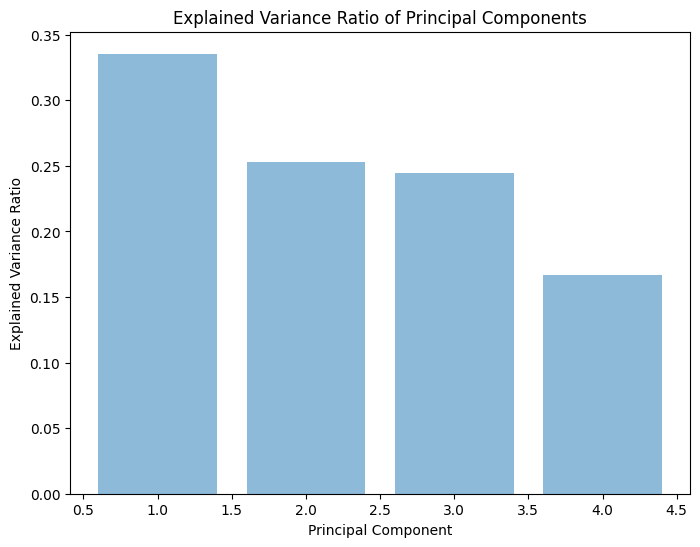

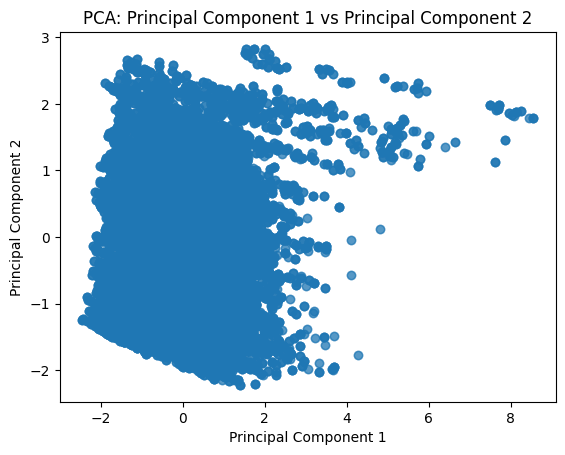

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.show()


Transformed data after LDA:
[[-1.86897673 -0.17771266 -1.59383819  0.73025269]
 [-1.86897673 -0.17771266 -1.59383819  0.73025269]
 [-1.86897673 -0.17771266 -1.59383819  0.73025269]
 ...
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]
 [ 1.68485241  0.59431548 -1.33434437 -0.53624534]]


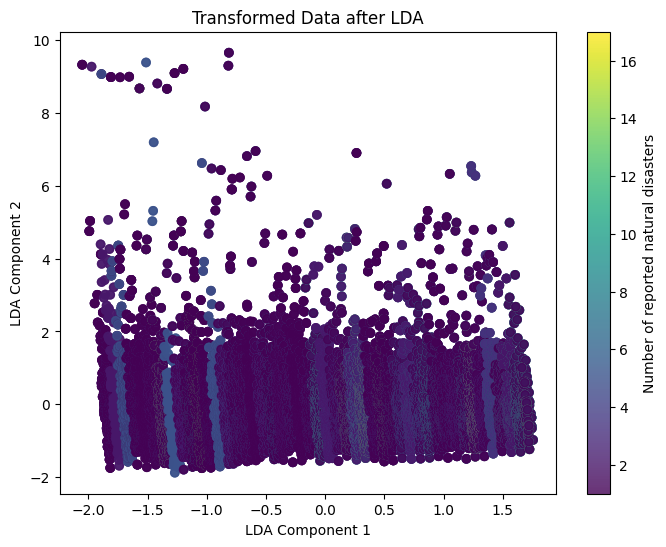

In [ ]:

import pandas as pd
# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Create the LDA object
lda = LinearDiscriminantAnalysis()

# Fit the LDA object to the data
lda.fit(X, y)

# Transform the data using LDA
X_transformed = lda.transform(X)

# Print the transformed data
print("Transformed data after LDA:")
print(X_transformed)


# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.title('Transformed Data after LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(label='Number of reported natural disasters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Transformed data after Independent Component Analysis (ICA):
[[-0.00323778 -0.00819889]
 [-0.00323778 -0.00819889]
 [-0.00323778 -0.00819889]
 ...
 [ 0.00656576 -0.00181168]
 [ 0.00656576 -0.00181168]
 [ 0.00656576 -0.00181168]]


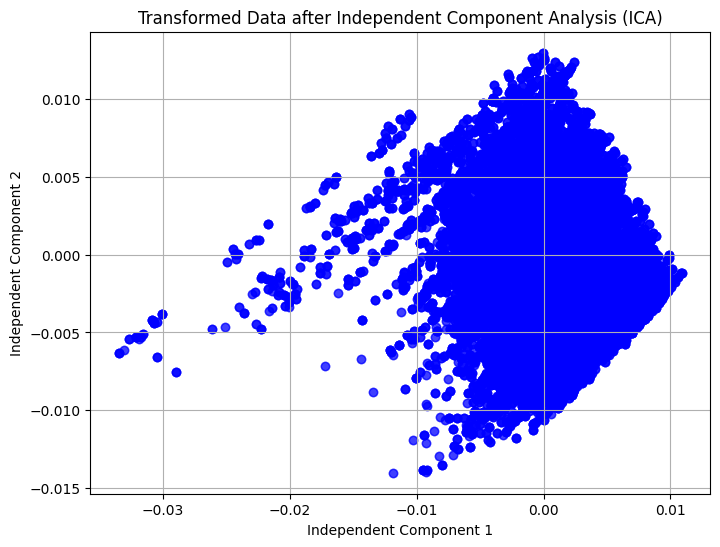

In [ ]:
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv("/content/TemperatureDisasterTrends.csv")

# Drop irrelevant columns (if any)
dataset = dataset.drop(columns=['dt', 'Entity', 'Code'])

# Convert 'Year' to categorical
dataset['Year'] = pd.Categorical(dataset['Year'])

# Convert 'Country' to categorical and encode it
dataset['Country'] = pd.Categorical(dataset['Country'])
dataset['Country'] = dataset['Country'].cat.codes

# Convert 'Number of reported natural disasters (reported disasters)' to numeric
dataset['Number of reported natural disasters (reported disasters)'] = pd.to_numeric(dataset['Number of reported natural disasters (reported disasters)'])

# Drop rows with missing values
dataset.dropna(inplace=True)

# Separate features and target variable
X = dataset.drop(columns=['Number of reported natural disasters (reported disasters)'])
y = dataset['Number of reported natural disasters (reported disasters)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Independent Component Analysis (ICA)
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Print the transformed data
print("Transformed data after Independent Component Analysis (ICA):")
print(X_ica)

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c='blue', alpha=0.5)
plt.title('Transformed Data after Independent Component Analysis (ICA)')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.grid(True)
plt.show()


